In [10]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 69.6 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import json
from matplotlib import cm

%matplotlib inline

# Load Data

In [9]:
cd "drive/MyDrive/Citadel Datathon 2023"

/content/drive/MyDrive/Citadel Datathon 2023


In [10]:

districts = gpd.read_file("data/Data Open 2023 Additional Data/Boundaries_District.geojson")

crime = pd.read_csv("data/APAC_2023_Datasets/Traffic, Investigations _ Other/crimes.csv")
geometry = [Point(xy) for xy in zip(crime['lng'], crime['lat'])]
crime_gdf = gpd.GeoDataFrame(crime, crs="EPSG:4326", geometry=geometry)
crime_with_district = gpd.sjoin(crime_gdf, districts, how='left', op='within')
crime_with_district = crime_with_district.dropna(subset=["DIST_NUM"])

df_crash = pd.read_csv("data/APAC_2023_Datasets/Crashes/crash_info_general.csv")
geometry = [Point(xy) for xy in zip(df_crash['DEC_LONG'], df_crash['DEC_LAT'])]
crash_gdf = gpd.GeoDataFrame(df_crash, crs="EPSG:4326", geometry=geometry)
crash_with_district = gpd.sjoin(crash_gdf, districts, how='left', op='within')
crash_with_district = crash_with_district.dropna(subset=["DIST_NUM"])

traffic_stop_with_district = pd.read_csv("data/APAC_2023_Datasets/Traffic, Investigations _ Other/traffic_stops_philadelphia.csv")
geometry = [Point(xy) for xy in zip(traffic_stop_with_district['lng'], traffic_stop_with_district['lat'])]
traffic_stop_with_district = gpd.GeoDataFrame(traffic_stop_with_district, crs="EPSG:4326", geometry=geometry)

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-10-521a07508272>:9: DtypeWarning: Columns (97,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  df_crash = pd.read_csv("data/APAC_2023_Datasets/Crashes/crash_info_general.csv")
/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-10-521a07508272>:15: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_stop_with_district = pd.read_csv("data/APAC_2023_Datasets/Traffic, Investigations _ Other/tra

In [11]:
df = pd.read_csv("data/merged_data_onehot.csv")
df_grouped = df.groupby("DIST_NUM").sum().reset_index()

district_with_feat = districts.merge(df_grouped[["index", "DIST_NUM", "crime_total", "car_crash", "traffic_stop_total"]], on="DIST_NUM", how='left')
district_with_feat.head()

<ipython-input-11-2cae7b56b190>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby("DIST_NUM").sum().reset_index()


OBJECTID  AREA     PERIMETER  DISTRICT_  DISTRICT_ID  DIST_NUM  SUM_AREA  \
0       343   NaN  69282.588463         16          NaN        16       NaN   
1       344   NaN  33150.154961         17          NaN        17       NaN   
2       345   NaN  54403.930038         18          NaN        18       NaN   
3       346   NaN  51597.051603         35          NaN        35       NaN   
4       347   NaN  58075.014444         39          NaN        39       NaN   

  DIST_NUMC                      LOCATION     PHONE DIV_CODE     AREA_SQMI  \
0        16     39th St. & Lancaster Ave.  686-3160     SWPD  1.216700e+08   
1        17        20th St. & Federal St.  686-3170      SPD  5.786368e+07   
2        18           55th St. & Pine St.  686-3180     SWPD  9.881929e+07   
3        35  N. Broad St. & Champlost St.  686-3350     NWPD  1.544309e+08   
4        39  22nd St. & Hunting Park Ave.  686-3390     NWPD  1.578976e+08   

    Shape__Area  Shape__Length  \
0  1.927226e+07   27575.079183   
1  9.154950e+06   13179.953350   
2  1.564117e+07   21629.610687   
3  2.450685e+07   20554.869138   
4  2.503787e+07   23123.580262   

                                            geometry        index  \
0  POLYGON ((-75.19957 40.00912, -75.19799 40.008...  1370.332675   
1  POLYGON ((-75.16599 39.94184, -75.16621 39.940...   535.164042   
2  POLYGON ((-75.18466 39.94851, -75.18633 39.947...  1274.701193   
3  POLYGON ((-75.13011 40.05789, -75.12898 40.057...  1103.057805   
4  POLYGON ((-75.17892 40.03175, -75.17782 40.031...  1329.701826   

   crime_total    car_crash  traffic_stop_total  
0  6749.973105  1180.542393         7664.221791  
1  2802.792626   463.094465         3422.415110  
2  6488.038767  1085.861882         7594.091115  
3  5632.484299   932.224918         6628.438945  
4  7297.278679  1154.641844         8818.256094

# Heatmap for Crash, Crime, Traffic Stop, Index, Other feats

### Crime

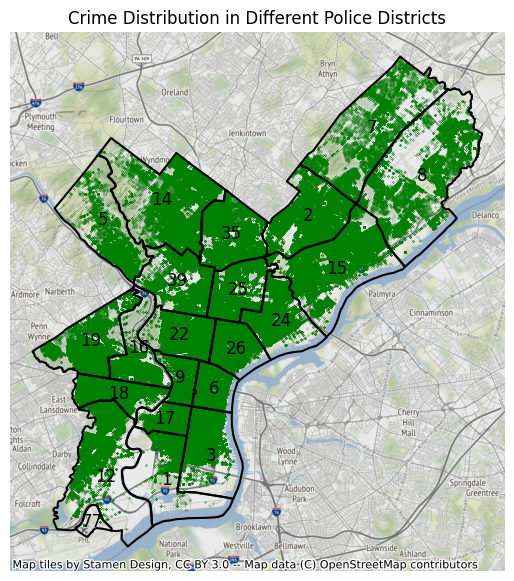

In [12]:
import geopandas
import contextily as cx
districts_wm = district_with_feat.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1,figsize=(7,7))
crime_with_district.to_crs(epsg=3857).plot(marker='o', color='green', markersize=0.01, ax=ax)
districts_wm.boundary.plot(ax=ax, color='k')
cx.add_basemap(ax)

for l,name in zip(districts_wm.centroid, districts.DISTRICT_):
    plt.text(l.x,l.y,name,ha='center', va='center',fontsize='12')

ax.set_axis_off()
ax.set_title('Crime Distribution in Different Police Districts');

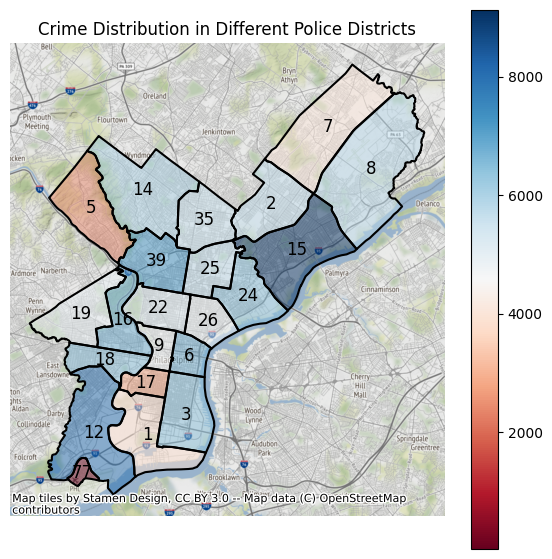

In [13]:
import geopandas
import contextily as cx
districts_wm = district_with_feat.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1,figsize=(7,7))
districts_wm.plot(column='crime_total',cmap='RdBu',legend=True, alpha=0.5, ax=ax)
districts_wm.boundary.plot(ax=ax, color='k')
cx.add_basemap(ax)

for l,name in zip(districts_wm.centroid, districts.DISTRICT_):
    plt.text(l.x,l.y,name,ha='center', va='center',fontsize='12')

ax.set_axis_off()
ax.set_title('Crime Distribution in Different Police Districts');

### Crash

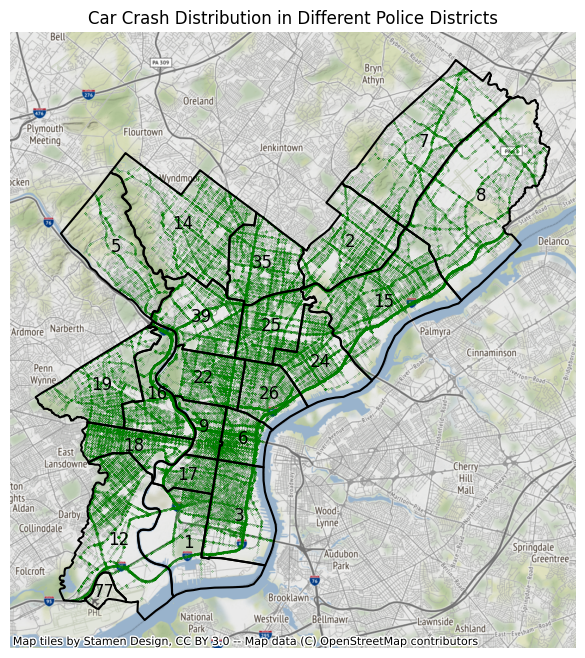

In [14]:
import geopandas
import contextily as cx
districts_wm = district_with_feat.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1,figsize=(8,8))
crash_with_district.to_crs(epsg=3857).plot(marker='o', color='green', markersize=0.01, ax=ax)
districts_wm.boundary.plot(ax=ax, color='k')
cx.add_basemap(ax)

for l,name in zip(districts_wm.centroid, districts.DISTRICT_):
    plt.text(l.x,l.y,name,ha='center', va='center',fontsize='12')

ax.set_axis_off()
ax.set_title('Car Crash Distribution in Different Police Districts');

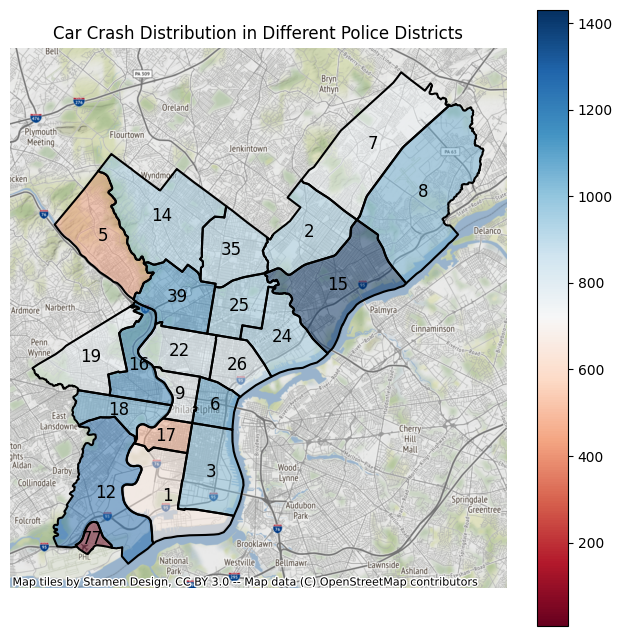

In [15]:
import geopandas
import contextily as cx
districts_wm = district_with_feat.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1,figsize=(8,8))
districts_wm.plot(column='car_crash',cmap='RdBu',legend=True, alpha=0.5, ax=ax)
districts_wm.boundary.plot(ax=ax, color='k')
cx.add_basemap(ax)

for l,name in zip(districts_wm.centroid, districts.DISTRICT_):
    plt.text(l.x,l.y,name,ha='center', va='center',fontsize='12')

ax.set_axis_off()
ax.set_title('Car Crash Distribution in Different Police Districts');



### Traffic Stop

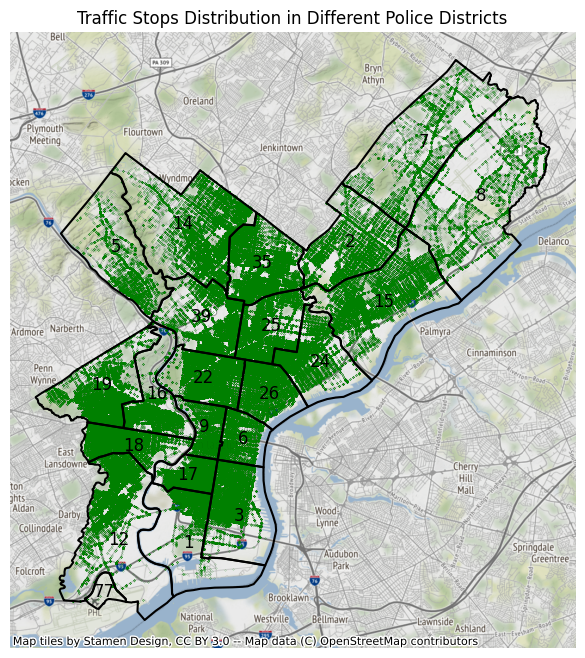

In [16]:
districts_wm = district_with_feat.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1,figsize=(8,8))
traffic_stop_with_district.to_crs(epsg=3857).plot(marker='o', color='green', markersize=0.01, ax=ax)
districts_wm.boundary.plot(ax=ax, color='k')
cx.add_basemap(ax)

for l,name in zip(districts_wm.centroid, districts.DISTRICT_):
    plt.text(l.x,l.y,name,ha='center', va='center',fontsize='12')

ax.set_axis_off()
ax.set_title('Traffic Stops Distribution in Different Police Districts');

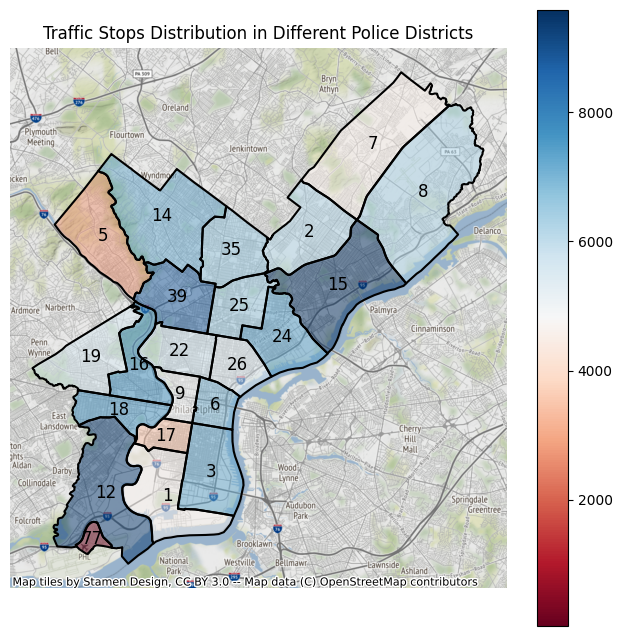

In [17]:
districts_wm = district_with_feat.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1,figsize=(8,8))
districts_wm.plot(column='traffic_stop_total',cmap='RdBu',legend=True, alpha=0.5, ax=ax)
districts_wm.boundary.plot(ax=ax, color='k')
cx.add_basemap(ax)

for l,name in zip(districts_wm.centroid, districts.DISTRICT_):
    plt.text(l.x,l.y,name,ha='center', va='center',fontsize='12')

ax.set_axis_off()
ax.set_title('Traffic Stops Distribution in Different Police Districts');

### Index

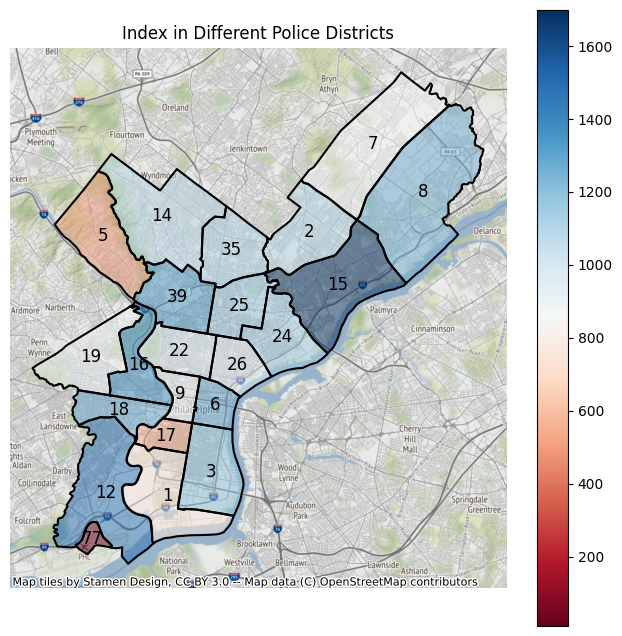

In [181]:
import geopandas
import contextily as cx
districts_wm = district_with_feat.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1,figsize=(8,8))
districts_wm.plot(column='index',cmap='RdBu',legend=True, alpha=0.5, ax=ax)
#crash_with_district.to_crs(epsg=3857).plot(marker='o', color='green', markersize=0.01, ax=ax)
districts_wm.boundary.plot(ax=ax, color='k')
cx.add_basemap(ax)

for l,name in zip(districts_wm.centroid, districts.DISTRICT_):
    plt.text(l.x,l.y,name,ha='center', va='center',fontsize='12')

ax.set_axis_off()
ax.set_title('Index in Different Police Districts');